In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
# import dataset
credit_df = pd.read_excel("C:/Users/lenovo/Desktop/py/Case Study 2 - Credit Card Case Study/credit card data.xlsx")

In [4]:
cust_ac_df = pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")

In [5]:
repay_df = pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 2 - Credit Card Case Study/Repayment.csv")

In [6]:
spend_df = pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 2 - Credit Card Case Study/spend.csv")
spend_df

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [7]:
spend_df.loc[2]

Sl No:              3
Customer           A1
Month       15-Jan-04
Type          CLOTHES
Amount       23740.46
Name: 2, dtype: object

In [8]:
## a. In case age is less than 18, replace it with the mean of age values.
mean_age = cust_ac_df['Age'].mean()
cust_ac_df.loc[cust_ac_df['Age'] < 18, 'Age'] = mean_age
cust_ac_df

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [9]:
## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
merged_df = pd.merge(spend_df, cust_ac_df[['Customer', 'Limit']], on='Customer', how='left')
merged_df['Amount'] = np.where(merged_df['Amount'] > merged_df['Limit'], 0.5 * merged_df['Limit'], merged_df['Amount'])
merged_df.drop('Limit' , axis=1, inplace = True)
merged_df

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,50000.00
1497,1498,A69,31-Mar-06,BUS TICKET,5000.00
1498,1499,A70,23-Mar-06,BUS TICKET,5000.50


In [10]:
## c. In case the repayment amount is more than the limit, replace the repayment with the limit.
merged_repay_df = pd.merge(repay_df, cust_ac_df[['Customer', 'Limit']], on='Customer', how='left')
merged_repay_df['Amount'] = np.where(merged_repay_df['Amount'] > merged_repay_df['Limit'], merged_repay_df['Limit'], merged_repay_df['Amount'])
merged_repay_df.drop('Limit', axis=1, inplace=True)
merged_repay_df

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [11]:
## a. How many distinct customers exist?
distinct_customers_count = spend_df['Customer'].nunique()
print(f"unique customers: {distinct_customers_count}")

unique customers: 100


In [12]:
## b. How many distinct categories exist?
distinct_categories_count = spend_df['Type'].nunique()
print(f"Number of distinct categories: {distinct_categories_count}")

Number of distinct categories: 15


In [13]:
## c. What is the average monthly spend by customers?
average_monthly_spend = spend_df.groupby('Month')['Amount'].mean()
print(f"Average monthly spend by customers:\n{average_monthly_spend}")

Average monthly spend by customers:
Month
1-Apr-06     199742.814615
1-Feb-05     244435.668571
1-Jun-05     268179.381429
10-May-06    260535.487143
11-Jul-06    273723.213571
                 ...      
6-Apr-04     225604.179286
6-May-06     265640.039286
7-May-05     244736.322143
8-May-06     251006.447857
9-May-05     240126.885714
Name: Amount, Length: 74, dtype: float64


In [14]:
## d. What is the average monthly repayment by customers? 
average_monthly_repayment = repay_df.groupby('Month')['Amount'].mean()  
print(f"d. Average monthly repayment by customers:\n{average_monthly_repayment}")

d. Average monthly repayment by customers:
Month
1-Apr-06     322867.034167
1-Feb-05     210963.528148
1-Jun-05     292818.261667
10-May-06    251725.888400
11-Jul-06    256539.412000
                 ...      
6-Apr-04     220084.550000
6-May-06     238609.498800
7-May-05     254167.934000
8-May-06     246715.778800
9-May-05     246647.308400
Name: Amount, Length: 74, dtype: float64


In [15]:
## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
merged_df = pd.merge(spend_df, repay_df, on=['Customer', 'Month'], how='outer', suffixes=('_spend', '_repayment'))
monthly_profit = (merged_df['Amount_repayment'] - merged_df['Amount_spend']).fillna(0)
monthly_interest_earned = (monthly_profit[monthly_profit > 0] * 0.029).sum()

print(f"Monthly profit for the bank:\n{monthly_profit}")
print(f" Interest earned on positive profits: {monthly_interest_earned}")

SyntaxError: unterminated string literal (detected at line 2) (4228838495.py, line 2)

In [19]:
## f. What are the top 5 product types?
top_5_product_types = spend_df['Type'].value_counts().head(5)
print(f"Top 5 product types:\n{top_5_product_types}")

Top 5 product types:
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64


In [20]:
## g. Which city is having the maximum spend?
merged_spend_city_df = pd.merge(spend_df, cust_ac_df[['Customer', 'City']], on='Customer', how='left')
max_spend_city = merged_spend_city_df.groupby('City')['Amount'].sum().idxmax()
print(f"City with maximum spend: {max_spend_city}")

City with maximum spend: COCHIN


In [21]:
## h. Which age group is spending more money?
merged_spend_age_df = pd.merge(spend_df, cust_ac_df[['Customer', 'Age']], on='Customer', how='left')
age_bins = [18, 25, 35, 50, 100]  
age_labels = ['18-24', '25-34', '35-49', '50+']
merged_spend_age_df['AgeGroup'] = pd.cut(merged_spend_age_df['Age'], bins=age_bins, labels=age_labels, right=False)
top_age_group = merged_spend_age_df.groupby('AgeGroup')['Amount'].sum().idxmax() 
print(f"Age group spending more : {top_age_group}")

Age group spending more money: 50+


In [17]:
## i. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
top_10_customers_repayment = repay_df.groupby('Customer')['Amount'].sum().nlargest(10)
print(f"Top 10 customers in terms of repayment:\n{top_10_customers_repayment}")

Top 10 customers in terms of repayment:
Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64


In [18]:
plt.bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

City-wise spend on each product on a yearly basis:
Product                 Gold     Platimum      Silver
City       Year                                      
BANGALORE  2004   9289878.54   6046763.93  6773901.65
           2005  12892362.99   7784194.68  3936068.22
           2006  12030611.09   5620904.86  4967945.66
BOMBAY     2004   6987853.53   5199581.00  3061805.08
           2005   8983018.28   5134074.48  2368375.97
           2006   7917144.31   7547549.72  3628864.37
CALCUTTA   2004   7477140.98   5961165.93  3321963.10
           2005  10303355.80   8810284.03  1285609.11
           2006  11167532.77  11305526.03  4783182.26
CHENNAI    2004   1059618.50   5558572.68  1156129.37
           2005   3740945.58   8868435.43  1000540.48
           2006   2704288.62   6921130.79  1665326.62
COCHIN     2004   7315850.15   8472832.23  4587738.70
           2005  12110613.03  10856722.82  2619231.25
           2006  10499142.38  12453968.83  4579249.87
DELHI      2004   2806495.00   

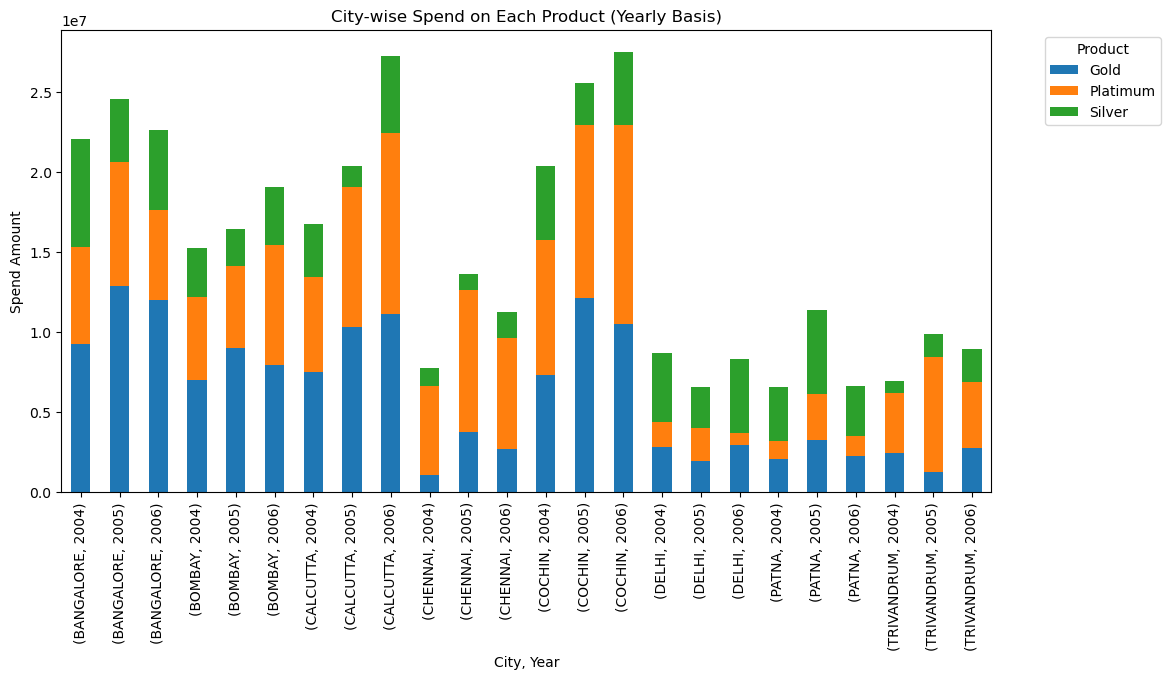

In [23]:
merged_spend_city_product_df = pd.merge(spend_df, cust_ac_df[['Customer','Product', 'City']], on='Customer', how='left')
merged_spend_city_product_df['Year'] = pd.to_datetime(merged_spend_city_product_df['Month']).dt.year
city_product_yearly_spend = merged_spend_city_product_df.groupby(['City' , 'Product' , 'Year'])['Amount'].sum().reset_index()
pivot_table = city_product_yearly_spend.pivot_table(index=['City', 'Year'], columns='Product', values='Amount', fill_value=0)
print("City-wise spend on each product on a yearly basis:")
print(pivot_table)

# Plotting a graphical representation
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('City-wise Spend on Each Product (Yearly Basis)')
plt.xlabel('City, Year')
plt.ylabel('Spend Amount')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

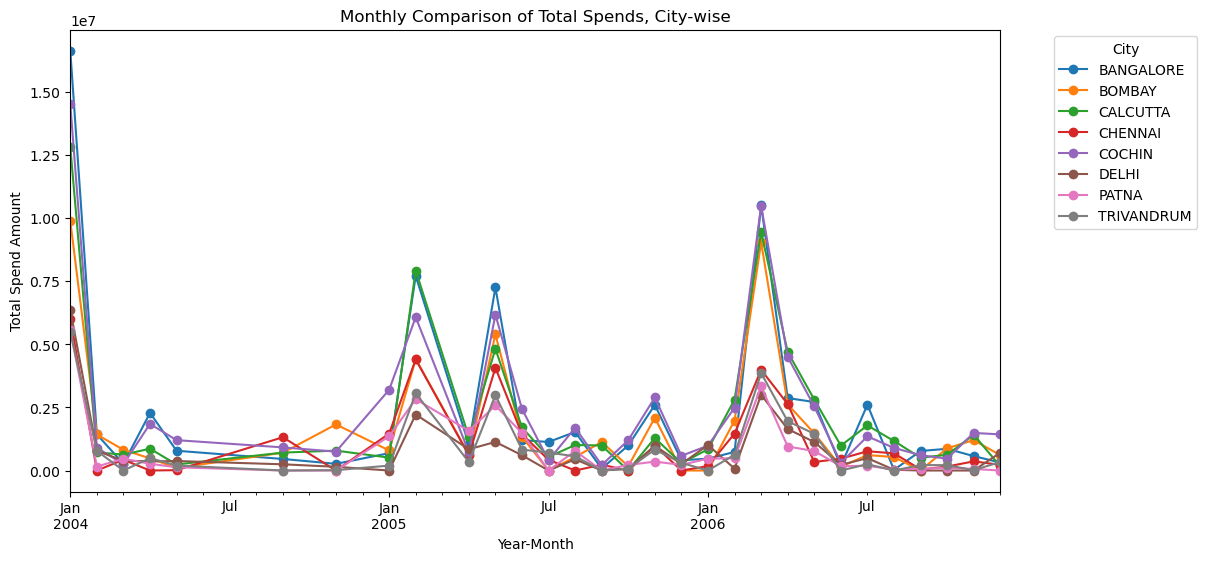

In [24]:
## Monthly comparison of total spends, city wise
merged_spend_city_df = pd.merge(spend_df, cust_ac_df[['Customer', 'City']], on='Customer', how='left')
merged_spend_city_df['Month'] = pd.to_datetime(merged_spend_city_df['Month'])
merged_spend_city_df['YearMonth'] = merged_spend_city_df['Month'].dt.to_period('M')
city_monthly_spend = merged_spend_city_df.groupby(['City', 'YearMonth'])['Amount'].sum().reset_index()

pivot_table_city_monthly = city_monthly_spend.pivot_table(index='YearMonth', columns='City', values='Amount', fill_value=0)

# Plotting a graphical representation
pivot_table_city_monthly.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Comparison of Total Spends, City-wise')
plt.xlabel('Year-Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


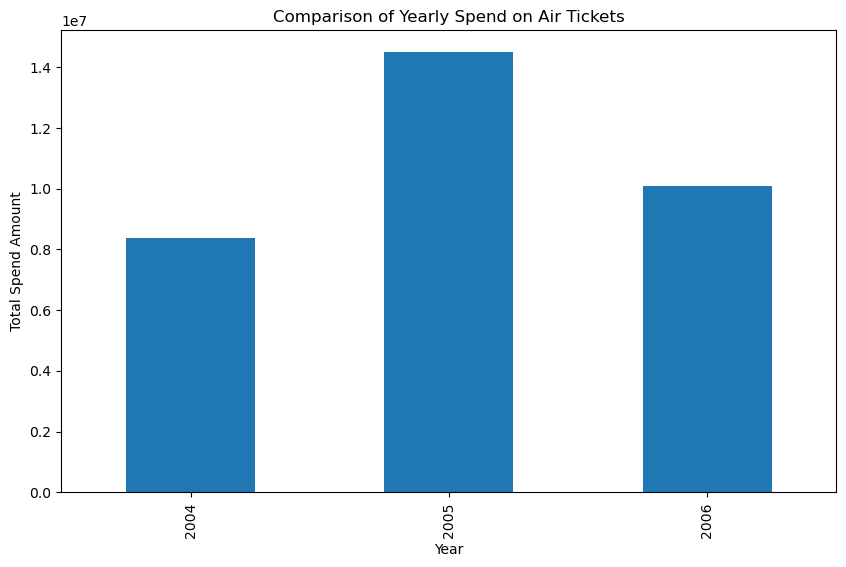

In [25]:
## Comparison of yearly spend on air tickets

spend_df['Year'] = pd.to_datetime(spend_df['Month']).dt.year

air_tickets_spend = spend_df[spend_df['Type'] == 'AIR TICKET']


yearly_air_tickets_spend = air_tickets_spend.groupby('Year')['Amount'].sum()

yearly_air_tickets_spend.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend Amount')
plt.show()


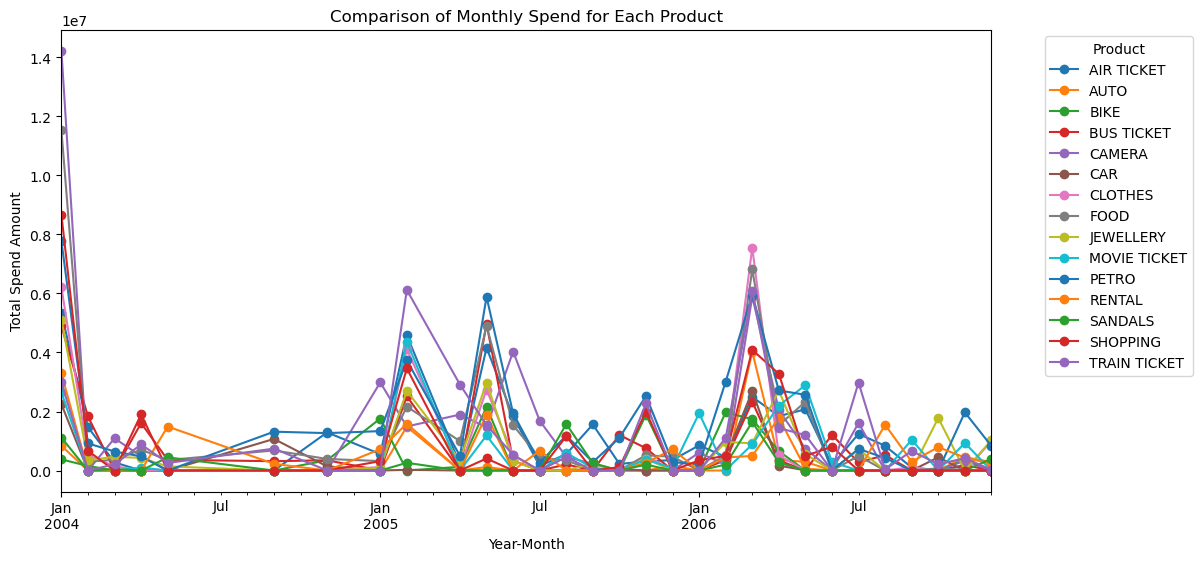

In [26]:
## Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
spend_df['Month'] = pd.to_datetime(spend_df['Month'])
spend_df['YearMonth'] = spend_df['Month'].dt.to_period('M') 

# Group by Product and YearMonth and calculate the sum of spend
monthly_product_spend = spend_df.groupby(['Type', 'YearMonth'])['Amount'].sum().reset_index()

# Pivot the table for better readability
pivot_table_product_monthly = monthly_product_spend.pivot_table(index='YearMonth', columns='Type', values='Amount', fill_value=0)
# Plotting a graphical representation
pivot_table_product_monthly.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Comparison of Monthly Spend for Each Product')
plt.xlabel('Year-Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
def top_customers_by_repayment_v3(city, product, time_period='yearly', top_n=10):
     
    merged_df = pd.merge(repay_df, cust_ac_df[['Customer', 'City', 'Product']], on='Customer', how='left')
    filtered_df = merged_df[(merged_df['City'] == city) & (merged_df['Product'] == product)] V

    if  time_period == 'yearly':
        filtered_df['Year'] = pd.to_datetime(filtered_df['Month']).dt.year
        group_by_column = 'Year'
    elif time_period == 'monthly':
        filtered_df['Month'] = pd.to_datetime(filtered_df['Month'])
        filtered_df['YearMonth'] = filtered_df['Month'].dt.to_period('M')
        group_by_column = 'YearMonth'
    else:
        raise ValueError("Invalid time period. Choose 'yearly' or 'monthly'.")
    grouped_df = filtered_df.groupby(['Customer', group_by_column])['Amount'].sum().reset_index()
    top_customers = grouped_df.sort_values(by='Amount', ascending=False).groupby(group_by_column).head(top_n)
       
    return top_customers


city_input = 'DELHI' 
product_input = 'Gold' 
time_period_input = 'monthly'  
top_n_customers = 10

result = top_customers_by_repayment_v3(city_input, product_input, time_period_input, top_n_customers)
print(result)


   Customer YearMonth      Amount
6       A44   2005-05  1988158.24
0       A44   2004-01  1951360.74
10      A44   2006-03   696222.43
4       A44   2005-02   632243.90
7       A44   2005-08   539494.72
12      A44   2006-07   501962.99
3       A44   2005-01   464352.17
8       A44   2005-11   431079.67
16      A93   2004-01   342326.14
15      A82   2006-03   342200.74
11      A44   2006-04   231843.43
14      A64   2006-12   212614.48
1       A44   2004-02   113508.29
13      A64   2006-05   110614.61
2       A44   2004-04    84514.47
9       A44   2005-12    79696.21
5       A44   2005-04    30292.86


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8560\2740760093.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.to_datetime(filtered_df['Month'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8560\2740760093.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YearMonth'] = filtered_df['Month'].dt.to_period('M')
